<a href="https://colab.research.google.com/github/YgorLourenco/Meu-Portfolio-Data-Science/blob/main/Projeto_Detec%C3%A7%C3%A3o_de_Fraude_em_Cart%C3%B5es_de_Cr%C3%A9dito(05_10_21).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Minha logo" width="100%" src="https://i.imgur.com/Zk6Fjo1.jpg">

# Detecção de Fraudes em Cartões de Crédito

Neste projeto, iremos abordar o problema das fraudes em cartões de crédito, uma das principais preocupações das instituições financeiras como bancos e *fintechs*. Apenas no Brasil, cerca de 12,1 milhões de pessoas já foram vítimas de algum tipo de fraude financeira no último ano. Traduzindo em valores, os golpes financeiros ultrapassaram a cifra de R$ 1,8 bilhão de prejuízo por ano para os últimos 12 meses.

<p align=center>
<img src="http://sigmoidal.ai/wp-content/uploads/2019/12/900.jpg" width="60%"></p>

Dentra essas fraudes, aquelas envolvendo cartões de crédito são de grande relevância uma vez que a sua não-detecção acaretará em prejuízos consideráveis, tanto para o consumidor quanto para a instituição financeira.

Um outro fator a ser considerado é a quantidade de falsos positivos, ou seja, aquelas vezes em que você tentou fazer uma compra e teve seu cartão bloqueado preventivamente - o que provavelmente gerou estresse e constrangimento.

Por todos esses motivos, o investimento na área de detecção de fraudes por meio de Inteligência Artificial vem crescendo a cada ano, representando uma grande oportunidade em *Data Science*. 

Dispondo de grandes volumes de dados como base histórica, um algoritmo de machine learning apenas um pouco melhor que os anteriores já representa uma economia de milhões de Reais. E esse é o desafio, aprimorar cada vez mais o uso de algoritmos visando inibir ou evitar transações fraudulentas.

## Breve descrição das variaveis

As váriaveis do conjunto de dados `creditcard.csv` são:


*   `Time` - Tempo das transações
*   `V1 até V28` - São variaveis que são correspondentes a empresas de cartões com valores de suas operações.
* `Amount` - São valores das transações feitas em dinheiro
* `Class` - São os valores binarios, onde `0` são transações normais e `1` são transações que tiveram fraudes.



## Importando os Dados

Os dados que usaremos neste projeto foram disponibilizados por algumas empresas européias de cartão de crédito. O *dataset* representa as operações financeiras que aconteceram no período de dois dias, onde foram classificadas 492 fraudes em meio a quase 290 mil transações.

Como você pode notar, este é um conjunto de dados extremamente desbalanceado, onde as fraudes representam apenas 0,17% do total.

Outro detalhe interessante é que as *features* são todas numéricas, e foram descaracterizadas (por problemas ligados à privacidade e segurança). Assim, os nomes das colunas são representados por $[V1, V2, V3 \dots, V28]$ 

<p align=center>
<img src="http://sigmoidal.ai/wp-content/uploads/2019/12/54.jpg" width="50%"></p>

[Na página original dos dados](https://www.kaggle.com/mlg-ulb/creditcardfraud), também é informado que as variáveis passaram por uma transformação conhecida como Análise de Componentes Principais (*Principal Component Analysis* - PCA).

A PCA permite a redução da dimensionalidade enquanto mantém o maior número possível de informações. Para conseguir isso, o algoritmo encontra um conjunto novo de recursos - os chamados **componentes**.

Esses componentes são em número menor or igual às variáveis originais. No caso deste projeto, os componentes achados pela transformação da PCA são as próprias colunas $[V1, V2, V3 \dots, V28]$.

In [6]:
# importar os pacotes necessários
# Pacotes padrões de analise e visualização
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
!pip install -q scikit-plot
import scikitplot as skplt # Facilita a plotagem de analises de machine learning feito com o Sckit-Learn

# Pacotes para treinamento e Regressão Linear
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Regressão Logistica
from sklearn.linear_model import LogisticRegression

# Pacotes para metricas de erro dos modelos de Machine Learning
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score

# Pacotes de Balancemanto
from sklearn.preprocessing import StandardScaler

# Pacotes de Balanceamento - Undersampling
from imblearn.under_sampling import RandomUnderSampler

# pip install -q scikit-plot

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


Para facilitar a aquisição dos dados, criei um *link* com acesso direto ao `csv`. Com isso, basta importar o conjunto de dados usando o método `pd.read_csv()`.

In [7]:
file_path = "https://www.dropbox.com/s/b44o3t3ehmnx2b7/creditcard.csv?dl=1"

# importar os dados para um dataframe
df = pd.read_csv(file_path)

Com os dados importados para dentro de uma estrutura *Dataframe* - e não havendo a necessidade de mais nenhum ajuste ou configuração nesta etapa, pode-se iniciar uma análise exploratória dos dados a fim de preparar um modelo de *Machine Learning*.

## Análise Exploratória

Abordar tópicos/informações como:

* Ver as 5 primeiras entradas
* Ver o resumo estatístico do dataframe
* Verificar se há valores ausentes
* Plotar um gráfico de barras (ou countplot) para ver o balanceamento do *dataset*
* Plotar os seguintes histogramas:
    * Variável `Time`
        * Fraude (`Class == 1`)
        * Normal (`Class == 0`)
    * Variável `Amount`
        * Fraude (`Class == 1`)
        * Normal (`Class == 0`)
* Plotar um `boxplot` para a variável `Amount` quando houve fraude (`Class == 1`)
* Plotar uma matriz de correlação

In [8]:
# Ver as 5 primeiras entradas
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [9]:
# Ver o resumo estatístico do dataframe
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### 01 - Existe um valor nulo?

In [10]:
# Verificar se há valores ausentes
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

O que tudo indica, que não há nenhum valor faltando nessa base de dados.

### 02 - Verificando o balanceamento do dataset
Sobre a variavel `Class` os valores:
* 0 - Representa que não ouve fraude
* 1 - Representa que houve fraude

Quantidade de onde não teve(0) e teve fraudes(1):
0    284315
1       492
Name: Class, dtype: int64

Fraudes representam 0.17275% 



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[]

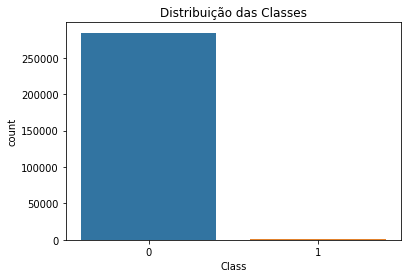

In [11]:
# Plotar um gráfico de barras (ou countplot) para ver o balanceamento do dataset

# Quantidade por inteiro
print('Quantidade de onde não teve(0) e teve fraudes(1):')
print(df.Class.value_counts())

# Quantidade em porcentagem das fraudes
print('\nFraudes representam {:.5}% \n'.format((df[df.Class == 1].shape[0] / df.shape[0]) * 100)) # Quantidade de linhas que existem "1" divido pelo total, depois multiplicado por 100

fig, ax = plt.subplots()
sns.countplot('Class', data=df, ax=ax)
ax.set_title('Distribuição das Classes')
plt.plot()

Houve uma diferença absurda entre as duas variaveis, o valor que representa "Não houve fraude"(representado pelo número "0") é desproporcional comparado há "Houve fraude"(representado pelo número "1"), precisando haver um balanceamento entre as duas variaveis. Sendo assim uma sugestão interessante seria usar a técnica de balanceamento chamada de "Undersampling", que tem como objetivo remover valores da varíavel maior(Variavel 0) para que haja um pouco mais de igualdade entre elas.

### 03 - Analisando a distribuição das váriaveis `Time` e `Amount`

Analisando a distribuição da variavel `Time` entre quantidade e frequência, onde representa o tempo das transações feitas em cada operação de compra com os cartões de crédito.

Text(0.5, 0, 'Quantidade')

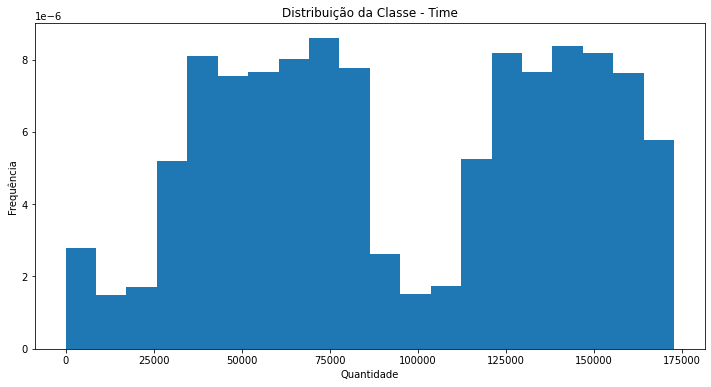

In [12]:
# Plotar os seguintes histogramas:
#Time
fig, ax = plt.subplots(figsize=(12,6))
df['Time'].plot(kind='hist', density=True, bins=20)
ax.set_title('Distribuição da Classe - Time')
ax.set_ylabel('Frequência')
ax.set_xlabel('Quantidade')

Nota-se que houve dois picos. Primeiro entre `25000` até `75000` segundos, e o segundo aos `125000` até `175000` segundos. 

Abaixo sera feito uma comparação entre a variavel `Time` e a `Class`

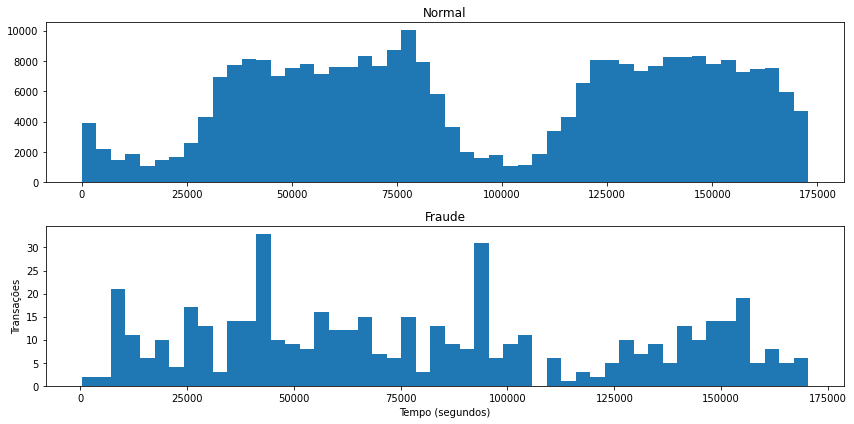

In [13]:
# Comparação entre as Time e os valores do Class
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12,6))

num_bins = 50

ax[0].hist(df.Time[df.Class == 0], bins=num_bins)
ax[0].set_title('Normal')

ax[1].hist(df.Time[df.Class == 1], bins=num_bins)
ax[1].set_title('Fraude')

plt.xlabel('Tempo (segundos)')
plt.ylabel('Transações')
plt.tight_layout()

Nota-se novamente um padrão, que como foi mostrado no [histograma anterior](https://colab.research.google.com/drive/1kQiBRSyrcBE5O-pl6tZ5OHVe_I2JOwjz#scrollTo=hQwWGkydSF3x&line=1&uniqifier=1) o primeiro pico que vai do `25000` até `75000` segundos de transações normais, possui o maior pico de fraude de cartão no número de transações feitas por segundos. O segundo pico de fraude de cartão, vem logo após a queda deste primeiro pico de transações normais.

Analisando a distribuição da variavel `Amount` entre quantidade e frequência, onde representa o valor das transações feitas em cada operação de compra com os cartões de crédito.

O valor outlier é $25691.16

O valor da média é $88.35

O valor da mediana é $22.0

O valor mais comum é $77.16



Text(0.5, 0, 'Quantidade')

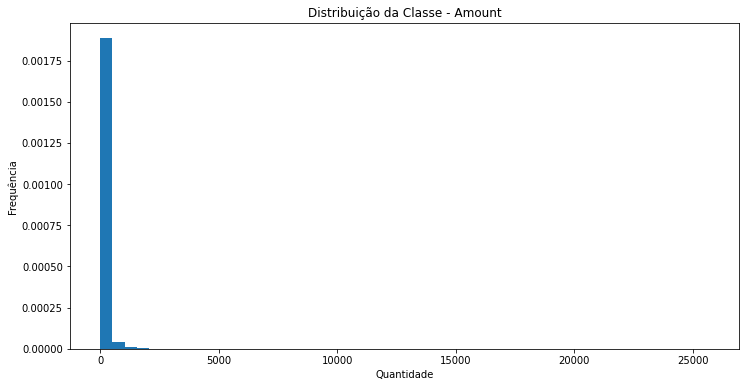

In [14]:
# Plotar os seguintes histogramas:

# Outlier de valor
print("O valor outlier é ${:.9}\n".format(df['Amount'].describe()['max']))
# Valor da média
print("O valor da média é ${:.4}\n".format(df['Amount'].describe()['mean']))
# Valor da mediana
print("O valor da mediana é ${:.4}\n".format(df['Amount'].describe()['50%']))
# Valor mais comum
print("O valor mais comum é ${:.4}\n".format(df['Amount'].describe()['75%']))

#Amout
fig, ax = plt.subplots(figsize=(12,6))
df['Amount'].plot(kind='hist', density=True, bins=50)
ax.set_title('Distribuição da Classe - Amount')
ax.set_ylabel('Frequência')
ax.set_xlabel('Quantidade')


O valor média que é transacionado é de `$88.35`. O valor estranho que deve-se atentar e em relação ao outlier de `$25.691,16`.

### 04 - Comparando a variavel `Class` com o `Amount`

Comparando o valor de `Class`(Focando apenas no valor de fraudes) com o `Amount`, no grafíco de BoxPlot.

A média é 118.13

A médiana é 9.21

O maior valor é 1809.68



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


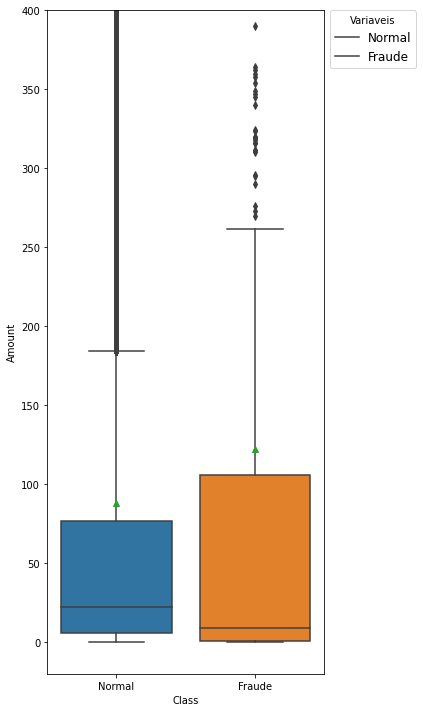

In [15]:
# Média e mediana do grafico de fraude:
print('A média é {:.5}\n'.format(df[(df.Class == 1) & (df.Amount < 2000)]['Amount'].describe()['mean']))
print('A médiana é {:.5}\n'.format(df[(df.Class == 1) & (df.Amount < 2000)]['Amount'].describe()['50%']))
print('O maior valor é {:.6}\n'.format(df[(df.Class == 1) & (df.Amount < 2000)]['Amount'].describe()['max']))


# Plotar um boxplot para a variável Amount quando houve fraude (Class == 1)
fig, ax = plt.subplots(figsize=(6,10),sharex=True) #sharex é um parametro pra colocar o grafico na vertical
sns.boxplot(df.Class, df.Amount, showmeans=True, ax=ax) # showmeans mostra o sinal da média no grafico 
plt.ylim((-20, 400)) #ylim é um metodo pra colocar limite no tamanho do grafico na vertical
plt.xticks([0,1],['Normal', 'Fraude'])
plt.legend(labels=["Normal","Fraude"], 
           title = "Variaveis", 
           loc = 2, 
           bbox_to_anchor = (1.02, 1), 
           fontsize = 'large', 
           title_fontsize = "10", 
           #bbox_to_anchor=(1.02, 1), 
           #loc='upper left', 
           borderaxespad=0)
plt.tight_layout()

Encontrasse uma mediana de fraude de `9.21`, o que acaba sendo estranho com uma média de `118.13`. Já que o maior valor é `1809.68`, destoando muito do resto dos valores.

### 05 - Correlacionando todas as variaveis com o Mapa de Calor

No grafíco de correlação abaixo, sera mostrado por um Mapa de Calor a correlação entre todas as variaveis do conjunto de dados.

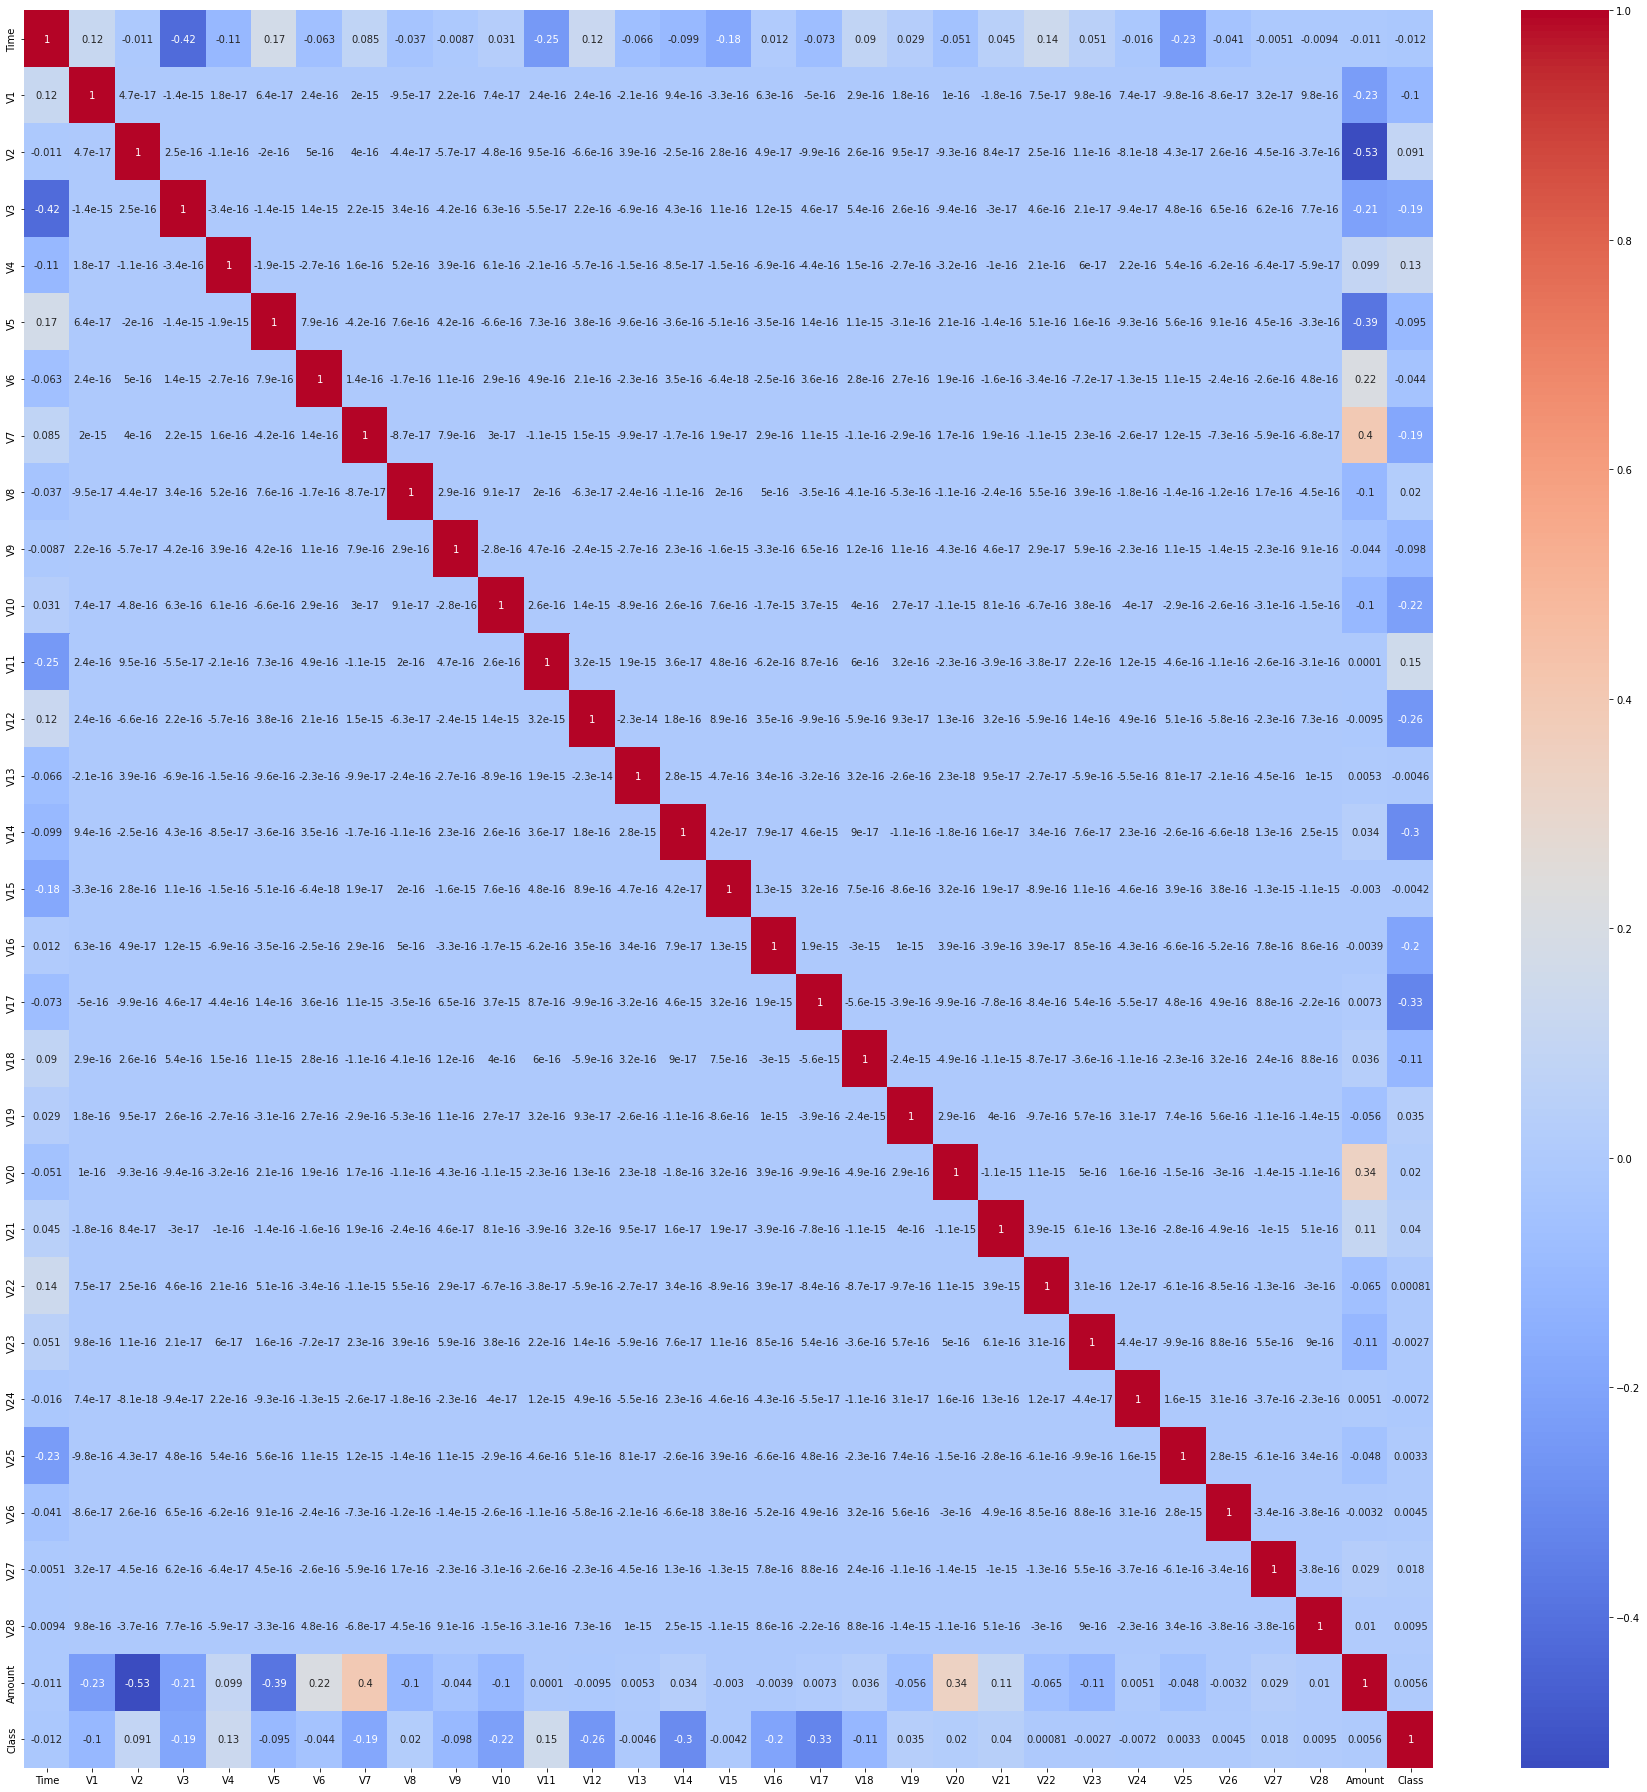

In [16]:
# Plotar uma matriz de correlação
fig, ax = plt.subplots(figsize=(25,25))
sns.heatmap(df.corr(), annot=True, ax=ax, cmap='coolwarm')
plt.tight_layout()

Nota-se que a variavel `Amount` se correlaciona bastante com as variaveis `V7` e `V20`. Por outro lado, as variaveis `V2` e `V5` existe uma rejeição muito grande com a variavel `Amount`.

### 06 - Gráfico de densidade para detectar anomalias com as variaveis `V1 até V28`

O uso do gráfico de densidade é interessante para comparar a distribuição e identificar anomalias entre as variaveis.

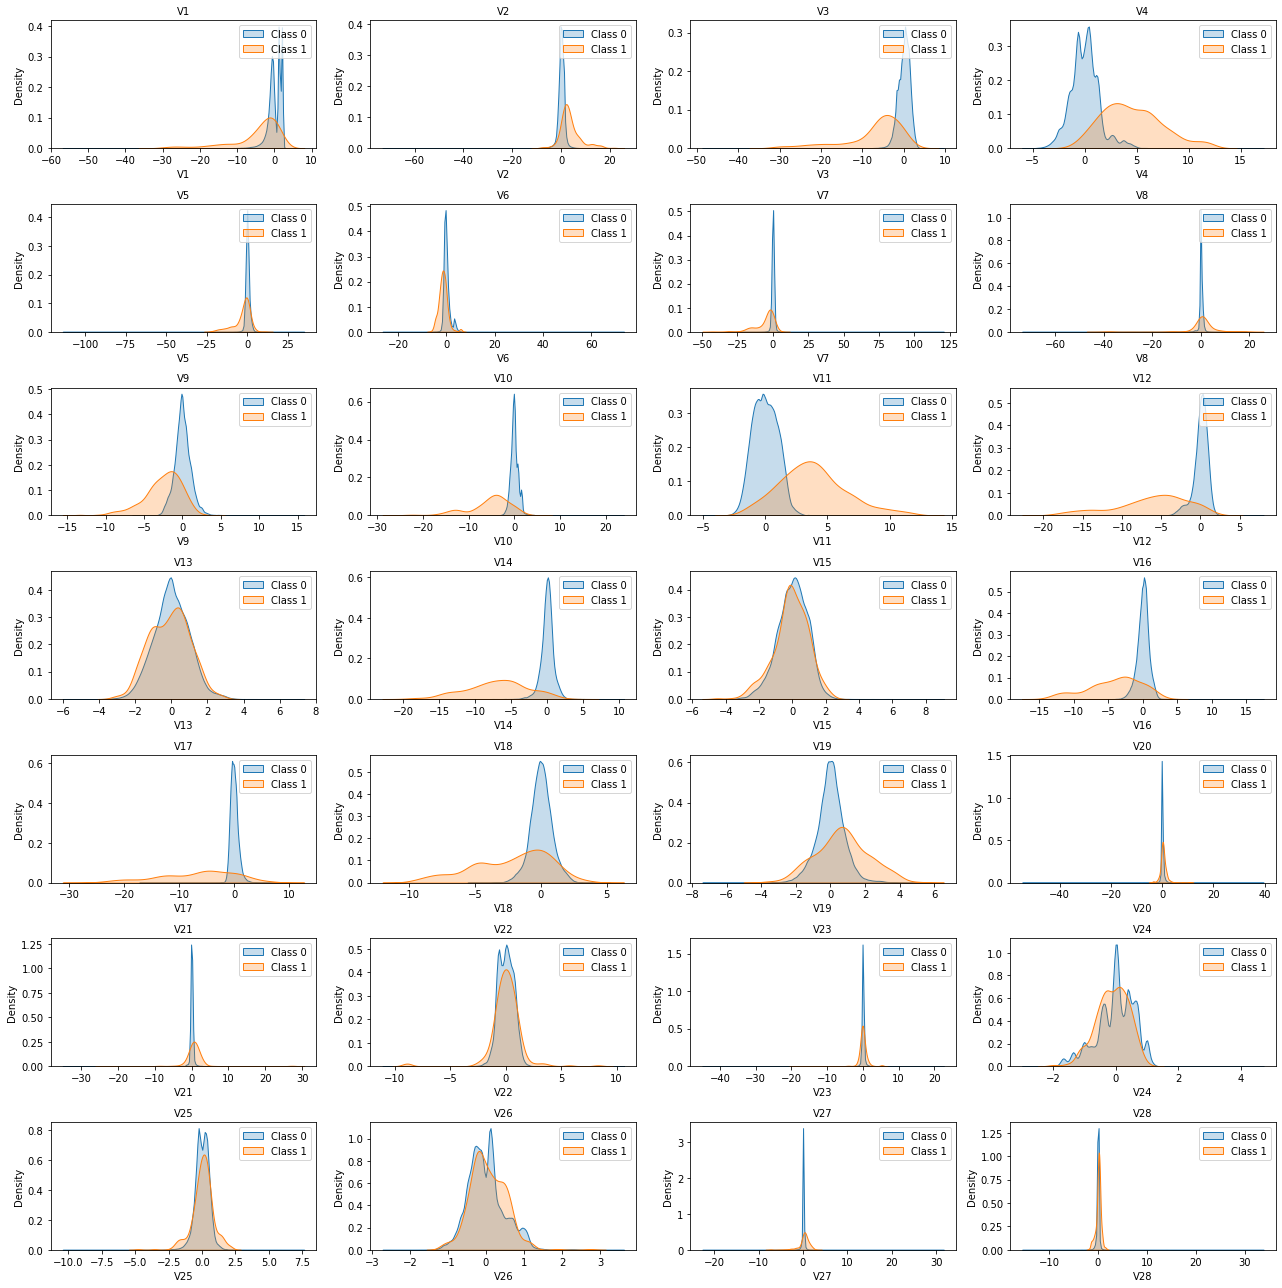

In [17]:
#Tirando as colunas Class, Amount e Time para focar apenas nas variaveis
column_names = df.drop(['Class', 'Amount', 'Time'], axis=1).columns
#Transformar colunas em números
num_plots = len(column_names)
#Armazenando os valores normais e de fraude
df_class_0 = df[df.Class == 0]
df_class_1 = df[df.Class == 1]

#Grafico de densidade
fig, ax = plt.subplots(nrows=7, ncols=4, figsize=(18,18))
fig.subplots_adjust(hspace=1, wspace=1)

# Pra cada coluna, criar um grafico de densidade
idx = 0
for col in column_names:
    idx += 1
    plt.subplot(7, 4, idx)
    sns.kdeplot(df_class_0[col], label="Class 0", shade=True)
    sns.kdeplot(df_class_1[col], label="Class 1", shade=True)
    plt.title(col, fontsize=10)
    plt.legend()
plt.tight_layout()


As variáveis `V3`,`V4`,`V10` e `V11`são bem distintas.

As variáveis `V8`,`V13` e `V15` são bem similares.

### 07 - Conclusão da etapa de "Análise Exploratória"


*   O Dataset apresenta problemas com desbalanceamento, contendo um valor desporcional sempre que é analisado a variavel `Class`. Onde o valor que representa fraudes(1) com 0,17%, não acompanha bem os valores sem fraudes(0) que representa todo o resto das transações.
* Seria interessante usar a técnica de Undersampling para corrigir esse desbalanceamento da variável `Class`.
*   Não existe valores nulos em nenhuma variável.
* As colunas `Time` e `Amount` precisam ser normalizadas.
* Parece existir uma relação entre a variável `Amount` com `V7` e `V20`.
* Existem dois picos na variável `Time`. Primeiro entre `25000` até `75000` segundos, e o segundo aos `125000` até `175000` segundos. 
* O maior pico de transações fraudulentas e no primeiro pico, entre `25000` até `75000` segundos.



## Preparação dos Dados

* Normalizar os dados que ainda não haviam sido pré-processados (`Time` e `Amount`)
* Dividir o conjunto de dados entre treino e teste
* [*Recomendado*] Balancear o conjunto de dados

### 08 - Padronizando as variáveis `Time` e `Amount`

Sera tratado aqui os valores outliers da variável `Amount`, com o uso do `StandardScaler()`.

In [18]:
# Padronize as colunas Time e Amount
df_clean = df.copy() #copia para modificar

# Uso do StandardScaler para padronizar Time e Amount
std_scaler = StandardScaler()
df_clean['std_amount'] = std_scaler.fit_transform(df_clean['Amount'].values.reshape(-1,1))
df_clean['std_time'] = std_scaler.fit_transform(df_clean['Time'].values.reshape(-1,1))

# Vai excluir os antigos valores e repor com os novos
df_clean.drop(['Time', 'Amount'], axis=1, inplace=True) 

# Ver as primeiras entradas
df_clean.head()


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,std_amount,std_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964,-1.996583
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475,-1.996583
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686,-1.996562
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534,-1.996562
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403,-1.996541


### 09 - Dividir entre conjuntos de treino e teste

Nesta etapa sera dividido a variável continua `Class` entre as variáveis de treino e teste, para após isso acontecer o balanceamento.

In [19]:
# Separando as variaveis X e Y
X = df.drop('Class', axis=1)
y = df['Class']

# Dividir o dataset entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, shuffle=True) # shuffle é um parametro pra embaralhar os dados antes de dividi-los
# strafify vai fazer uma moda para dividir dados com classes, como no caso do Class que possui duas class 0 e 1


### 10 - Balanceamento dos dados

1    369
0    369
dtype: int64 



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


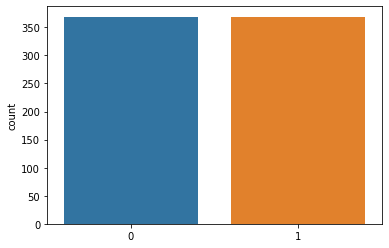

In [20]:
# Usando a técnica Under-Sampling
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_sample(X_train, y_train)

# Ver o balanceamento das classes
print(pd.Series(y_rus).value_counts(),'\n')

# Plotar a nova distribuição de classes
sns.countplot(y_rus);

Após o balanceamento, iremos analisar com a matriz de correlação como esta a correlação das variáveis, em comparação a que foi [feita anteriormente](https://colab.research.google.com/drive/1kQiBRSyrcBE5O-pl6tZ5OHVe_I2JOwjz#scrollTo=TFH0zeSflOJA). 

Pode-se observar antes que a matriz de correlação, com dados sem balanceamento, quase não trazia informações relevantes. Agora com os dados balanceados, nota-se a diferença positiva na localização da relação de cada variavel.

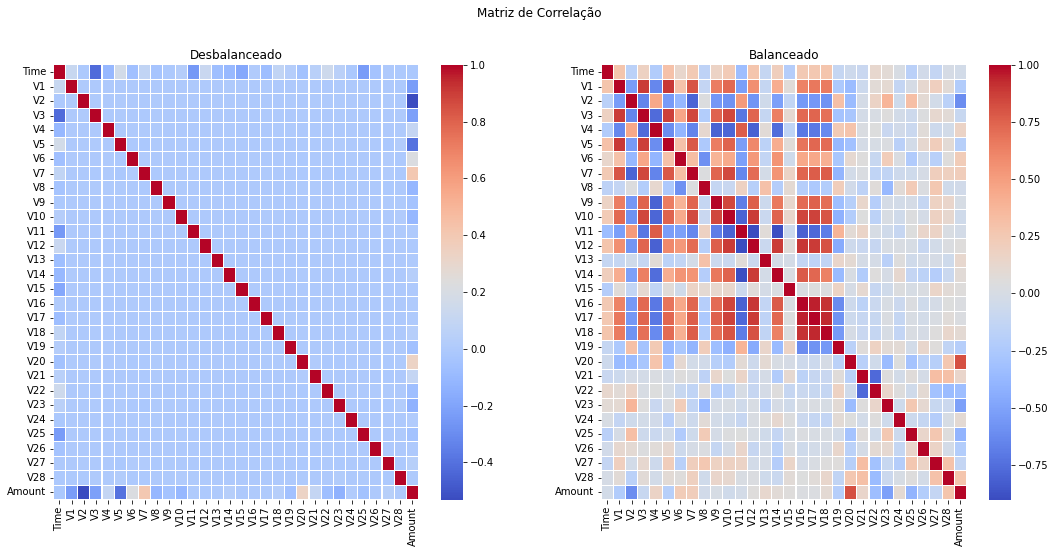

In [21]:
# Plotar a matriz de correlação
corr = X_train.corr()
corr_rus = pd.DataFrame(X_rus).corr()

# Configuração da Figure para colocar dois gráficos em um.
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18,8))
fig.suptitle('Matriz de Correlação')

# Grafico da esquerda sobre dados desbalanceados
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,
            linewidths=.1, cmap="coolwarm", ax=ax[0])
ax[0].set_title('Desbalanceado')

# Grafico da esquerda sobre dados balanceados
sns.heatmap(corr_rus, xticklabels=corr.columns, yticklabels=corr.columns,
            linewidths=.1, cmap="coolwarm", ax=ax[1])
ax[1].set_title('Balanceado')

plt.show()

## Modelo de Machine Learning


### 11 - Treinando o modelo de Regressão Logística

Nesta etapa sera construido um classificador de Regressão Logística, usando as variáveis `X_rus` e `y_rus`. Logo após sera feito a previsão da variável `X_test`.

In [22]:
# instanciar e treinar um modelo de Regressão Logística
np.random.seed(2) # Fixa valores aleatórios que foram gerados na primeira vez, no caso os dois primeiros valores de um array
model = LogisticRegression()
model.fit(X_rus, y_rus) # Vai padronizar os valores

# fazer as previsões em cima dos dados de teste
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)

### 12 - Plotando a Matrix de Confusão e avaliando os resultados

Após o modelo treinado e as previsões feitas, sera feito uma bateria de avaliações de resultdos, usando as seguinte técnicas:


*   Matrix de Confusão
*   Relatório de Classificação
* Acurácia do modelo
* Área sob a curva



Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9998    0.9640    0.9815     71079
           1     0.0398    0.8618    0.0760       123

    accuracy                         0.9638     71202
   macro avg     0.5198    0.9129    0.5288     71202
weighted avg     0.9981    0.9638    0.9800     71202

Acurácia: 0.9638

AUC: 0.9129



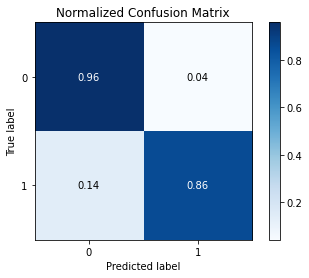

In [23]:
# plotar a matrix de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)

# imprimir relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_test, y_pred, digits=4))

# imprimir a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, y_pred)))

# imprimir a área sob a curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred)))

### 13 - Conclusão do Modelo de Machine Learning


*   Agora com os dados já balanceados, a acurácia teve uma melhora consideravel tendo um `Recall` na Matrix de Confusão de **93,69%** na `Class 0` e **91,87%** na `Class 1`.
*   A Acurácia do modelo foi de **93,69%**.
* A Área sob a curva é de **92,27%**.



### 14 - Utilizando o modelo de classificação Arvore de Decisão para avaliar possiveís cenários.

Primeiro cenário sera analisado com o critério `Gini`.

In [24]:
# 1. escolher e importar um modelo
from sklearn.tree import DecisionTreeClassifier

# 2. Instanciar e escolher os hyperparameters
model_tree = DecisionTreeClassifier(max_depth=8, criterion='gini')

# 3. Separar os dados entre feature matrix e target vector
#X = df.drop('num', axis=1)
#y = df['num']

# 3.1 Dividir o dataset entre treino e teste
#X_train, X_test, y_train, y_test = train_test_split(X, y)

# 4. Fit do modelo (treinar)
model_tree.fit(X_rus, y_rus)

# 5. Fazer previsões em cima de novos dados
y_pred = model_tree.predict(X_test)


In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96     71079
           1       0.02      0.89      0.04       123

    accuracy                           0.92     71202
   macro avg       0.51      0.90      0.50     71202
weighted avg       1.00      0.92      0.96     71202



In [26]:
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.9183169012106401


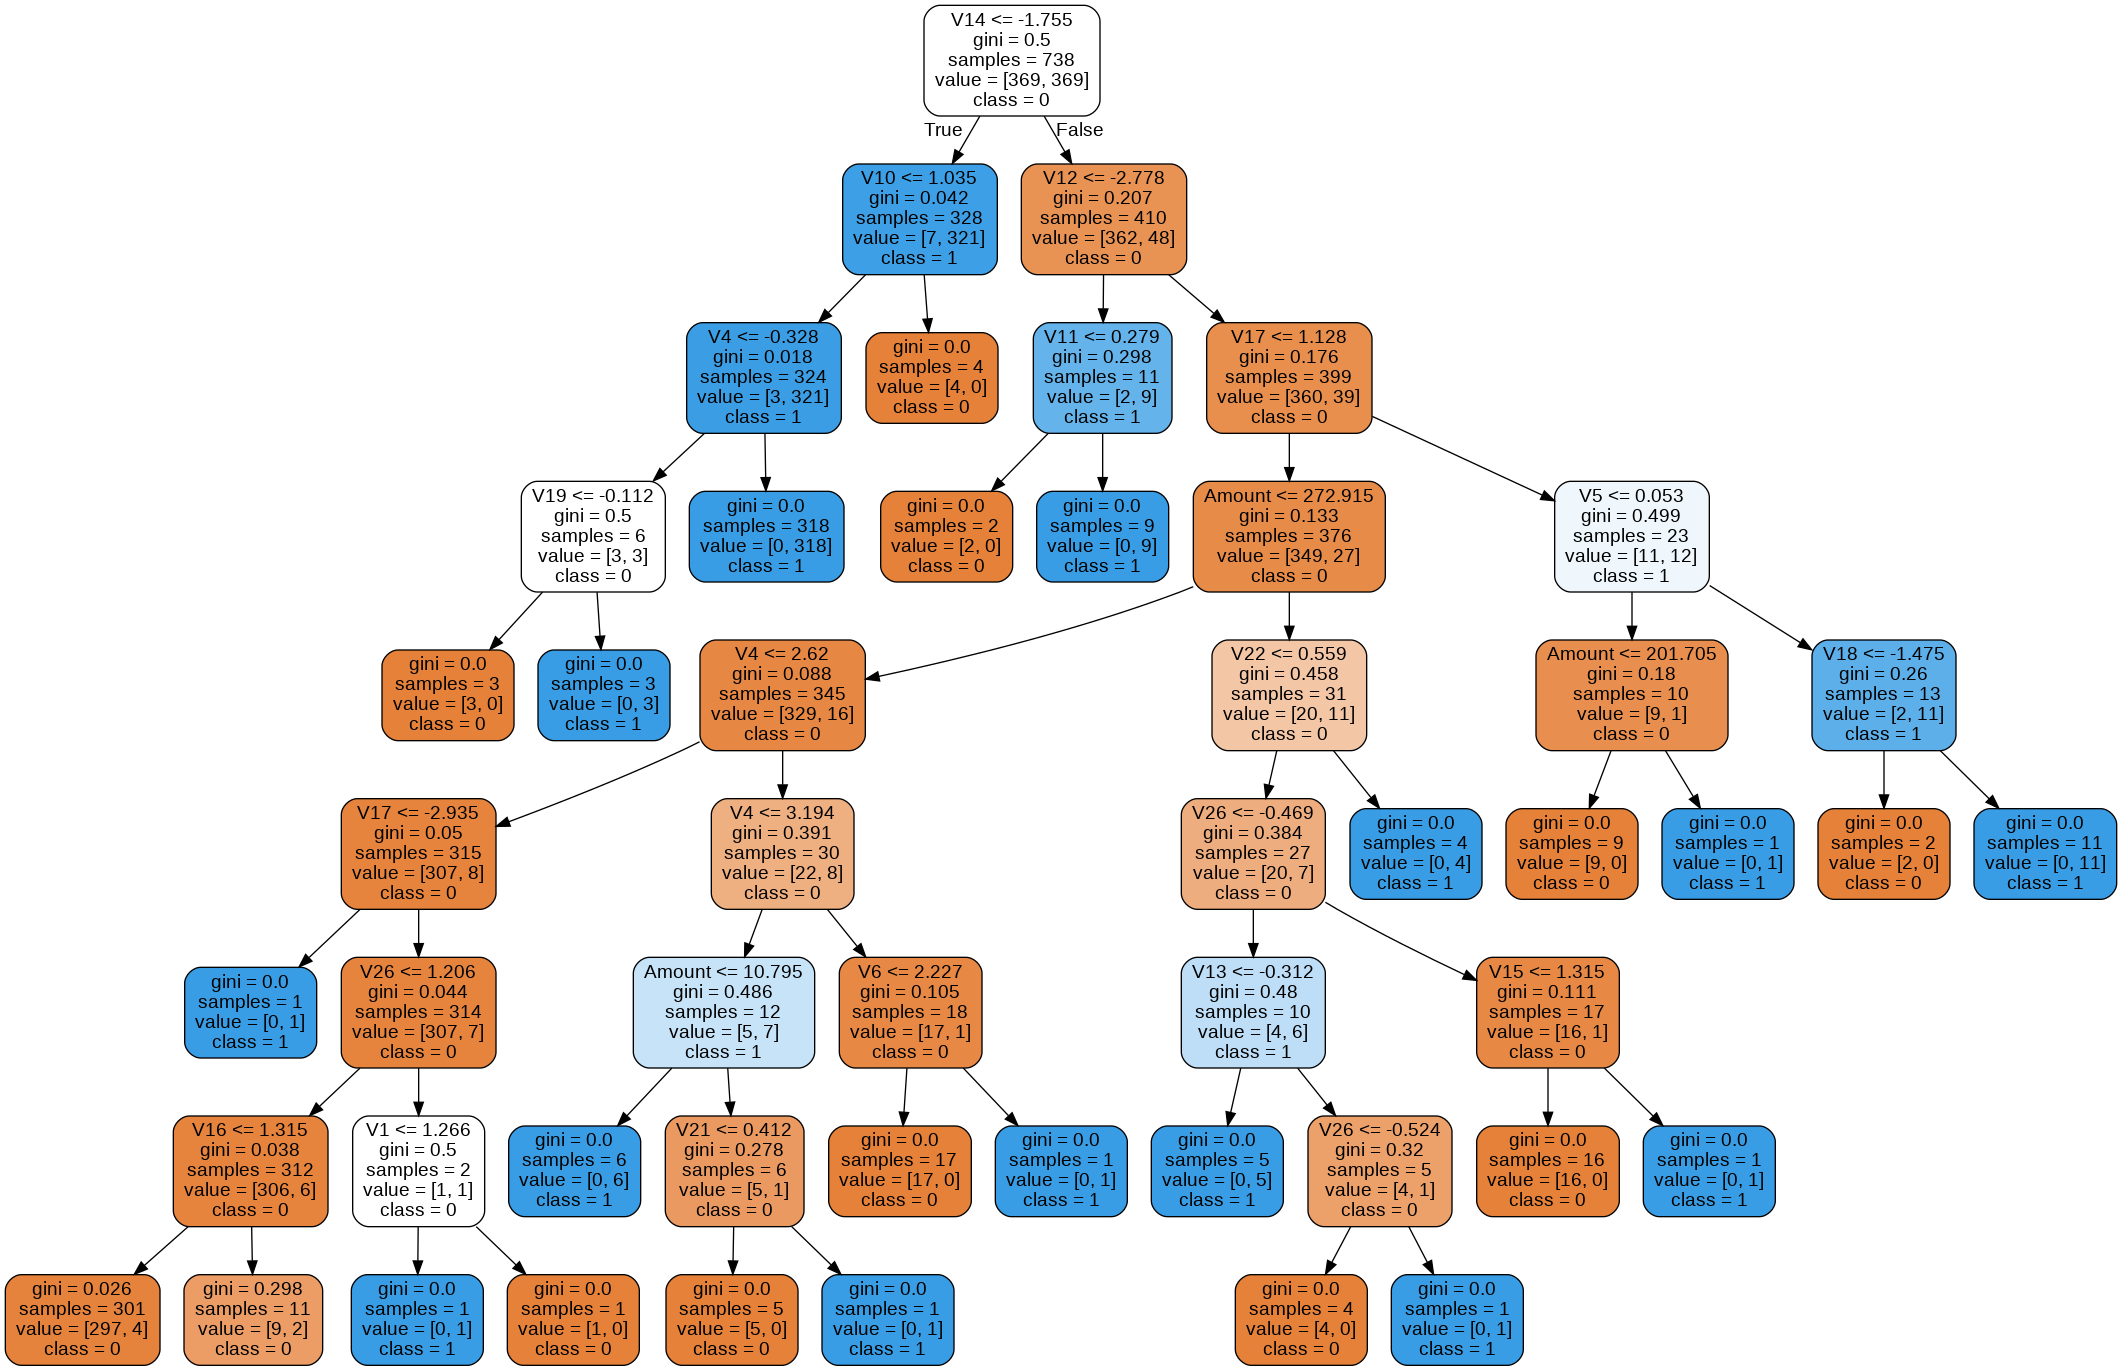

In [27]:
# importar bibliotecas
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# criar DOT 
dot = export_graphviz(model_tree, filled=True, rounded=True,
                      feature_names=X.columns, class_names=['0', '1'])

# plotar
graph = pydotplus.graph_from_dot_data(dot)  
Image(graph.create_png())

Segundo cenário sera analisado com critério `Entropia`

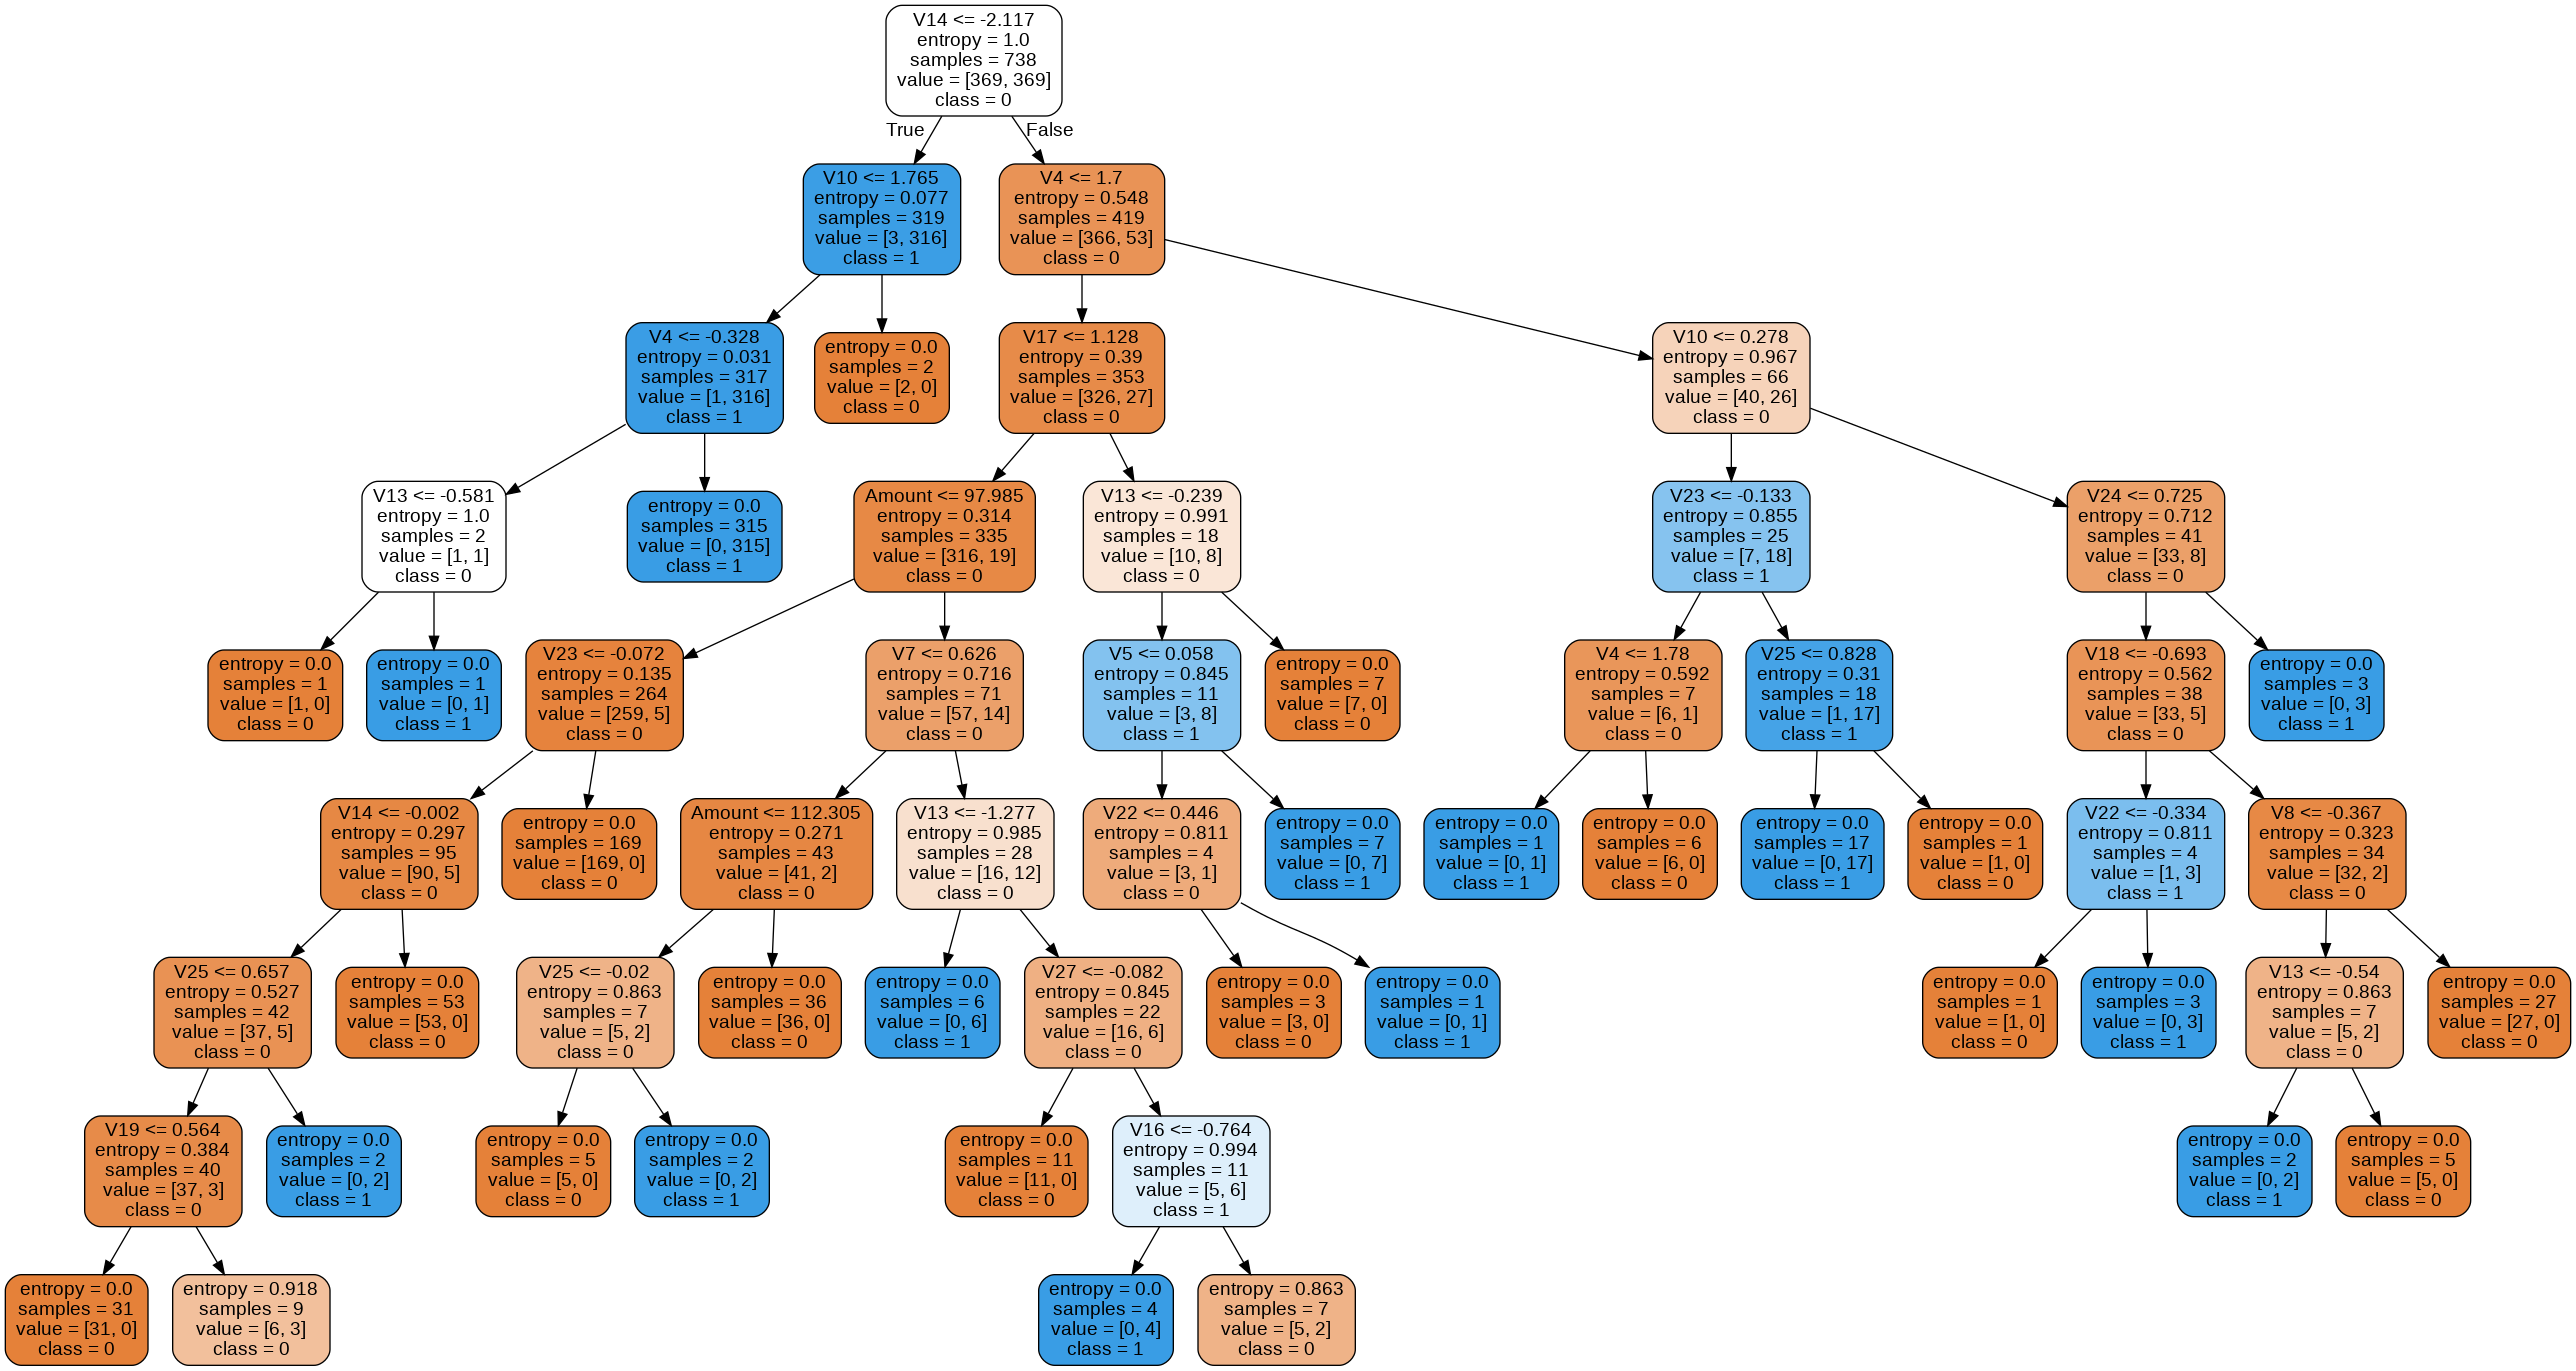

In [28]:
# 1. escolher e importar um modelo
from sklearn.tree import DecisionTreeClassifier

# 2. Instanciar e escolher os hyperparameters
model_tree = DecisionTreeClassifier(max_depth=8, criterion='entropy')

model_tree.fit(X_rus, y_rus)

# 5. Fazer previsões em cima de novos dados
y_pred = model_tree.predict(X_test)

from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# criar DOT 
dot = export_graphviz(model_tree, filled=True, rounded=True,
                      feature_names=X.columns, class_names=['0', '1'])

# plotar
graph = pydotplus.graph_from_dot_data(dot)  
Image(graph.create_png())

In [29]:
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.9109154237240527


## Conclusão

* Na árvore de decisão com `Gini`.Baseado na variável `V14`, analisa que o nó com maior probabilidade de existir fraudes e o `V7` vindo pelo nó `True` a esquerda da arvore.
* Na árvore de decisão com `Entropia`.Baseado na variável `V14`, analisa que o nó com maior probabilidade de existir fraudes e o `V12` vindo pelo nó `True` a esquerda da arvore.